In [7]:
! git clone https://github.com/bochendong/OCR.git

In [ ]:
! pip install -q datasets seqeval

In [ ]:
! python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
! huggingface-cli login

In [ ]:
import os
import torch
import torch.nn as nn

from Code.DataSet.DataPreprocess import DataPreprocessor
from Code.RLAgent.Agent import Q_LearningAgent
from Code.RLAgent.Train import train_rl_agent
from Code.RLAgent.Eval import EvalRlAgent
from Code.Environment.Environment import Env
from Code.Utils.GetBaseModel import getBaseModel
from Code.Utils.Logging import SetupLogging, PlotAgentLoss
from Code.Utils.Performance import Performance

In [8]:
def main(learning_rate=1e-6, gamma=0.99, action_length = 32, epoches = 5, reward = "normal", slow_start = True):
    Dir_PATH = f'./Log/action_length={action_length}_lr_{learning_rate}_reward={reward}_slow_start={slow_start}'

    if (os.path.exists(Dir_PATH) == False):
        os.mkdir(Dir_PATH)

    SetupLogging(Dir_PATH + "/log.txt")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    funsd = DataPreprocessor()

    train_loader, test_loader = funsd.GetDataLoader()

    model = getBaseModel(funsd.id2label, funsd.label2id).to(device)
    f1_cal = Performance(funsd.id2label)
    env = Env(model, device)

    criterion = nn.SmoothL1Loss()
    agent = Q_LearningAgent(action_length, device, criterion,
                            learning_rate=learning_rate, gamma = gamma, slow_start = slow_start)

    train_rl_agent(agent, env, train_loader, action_length, path = Dir_PATH, epoches = epoches)

    f1_score = EvalRlAgent(agent, env, test_loader, action_length, f1_cal)

    PlotAgentLoss(Dir_PATH)

    return agent, f1_score

## Experiment

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO - Policy: 0
INFO - Batch Num: 1, Agent Loss: 855.4017828851938, OCR_loss: 3.5379671901464462
INFO - Batch Num: 2, Agent Loss: 1676.8888558745384, OCR_loss: 4.177933230996132
INFO - Batch Num: 

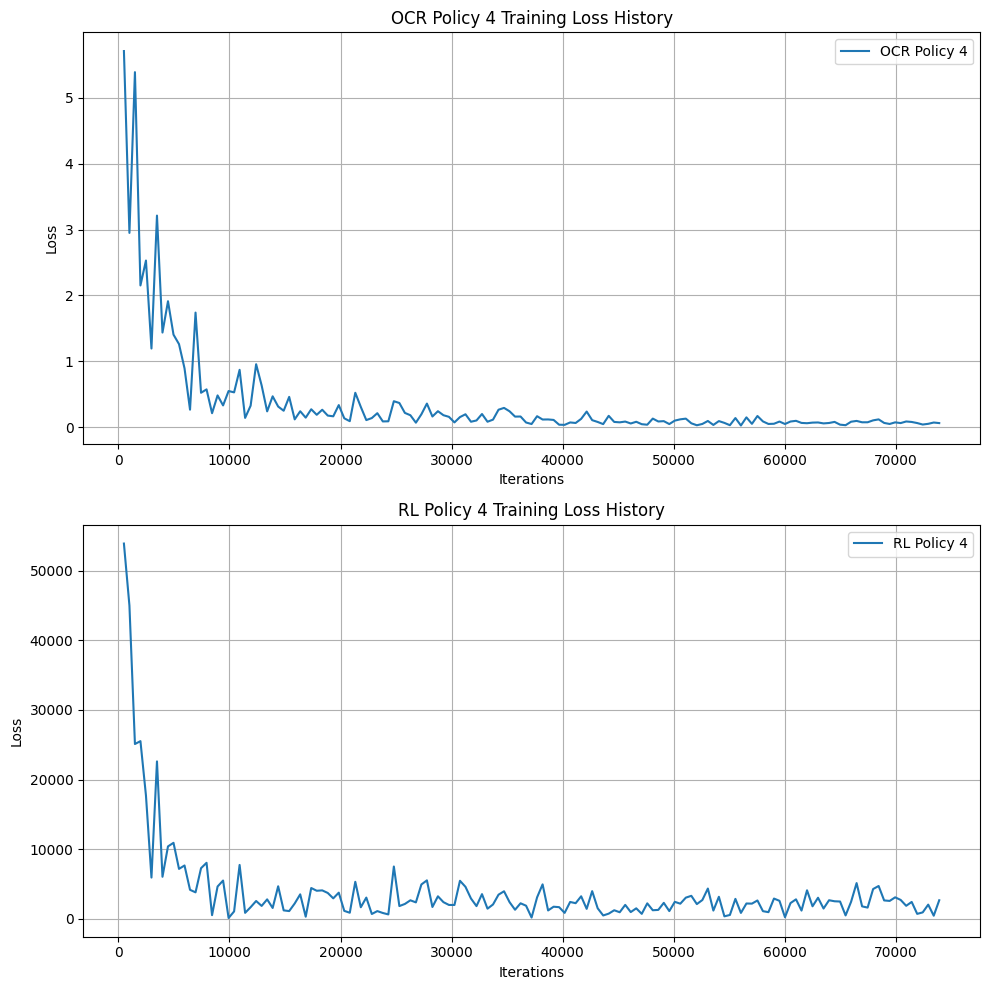

In [9]:
learning_rate = 1e-6
gamma=0.99
action_length = 16
epoch = 5
reward = "normal"
slow_start = True

agent_0, f1_score = main(learning_rate, gamma, action_length, epoch, reward, slow_start)

In [10]:
print(f"Experiment 1,test_f1_score: {f1_score} ")

Experiment 1,test_f1_score: 0.841487107773949 


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO - Policy: 0
INFO - Batch Num: 1, Agent Loss: 228.04656041041017, OCR_loss: 2.3154625296592712
INFO - Batch Num: 2, Agent Loss: 95.91146157402545, OCR_loss: 1.2544563561677933
INFO - Batch Num: 3, Agent Loss: 292.56474955379963, OCR_loss: 1.2080604905883472
INFO - Batch Num: 4, Agent Loss: 255.9449867978692, OCR_loss: 0.935510128736496
INFO - Batch Num: 5, Agent Loss: 179.8036249369383, OCR_loss: 0.3530663028359413
INFO - Batch Num: 6, Agent Loss: 78.04244384666283, OCR_loss: 0.23209794734915098
INFO - Batch Num: 7, Agent Loss: 343.2170336267778, OCR_loss: 0.5405229691948209
INFO - Batch Num: 8, Agent Loss: 19.292291881516576, OCR_loss: 0.2108907550573349
INFO - Batch Num: 9, Agent Loss: 18.691429724295

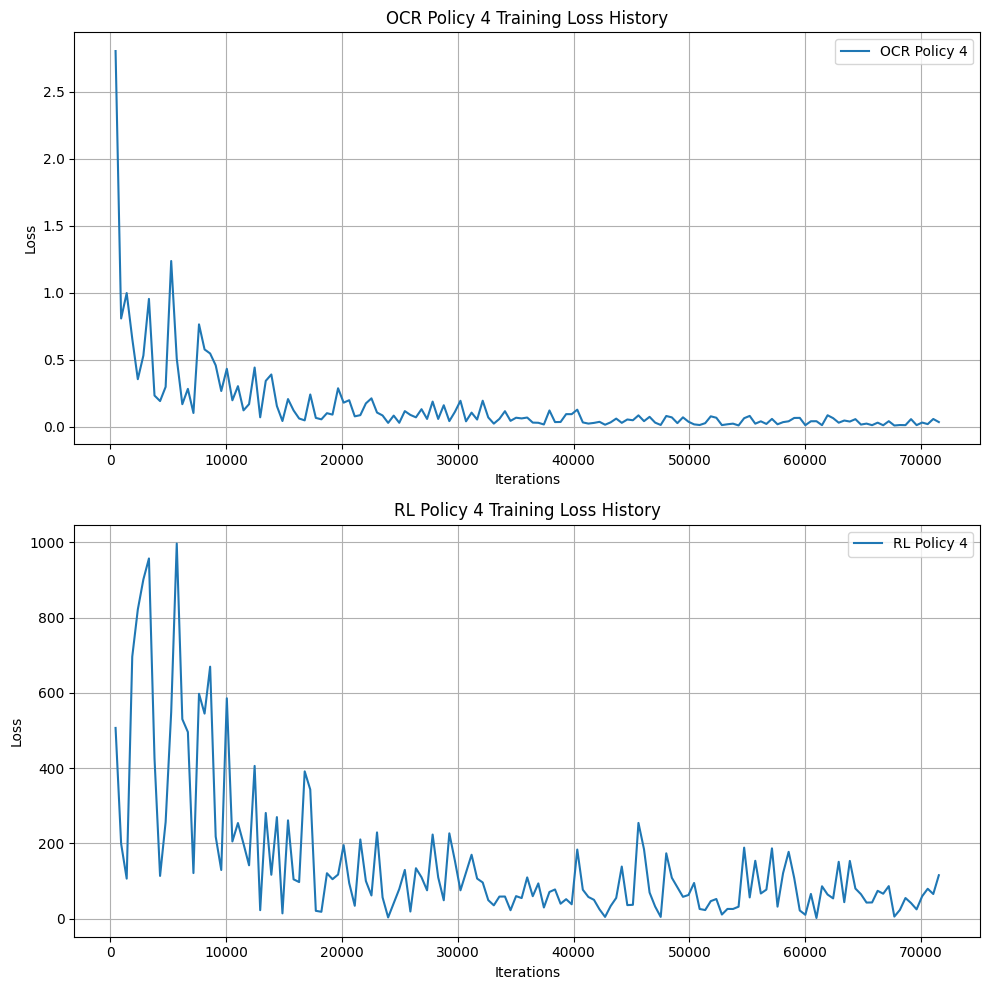

In [11]:
learning_rate = 1e-6
gamma=0.99
action_length = 32
epoch = 5
reward = "normal"
slow_start = True

agent_1, f1_score = main(learning_rate, gamma, action_length, epoch, reward, slow_start)

In [12]:
print(f"Experiment 2, test_f1_score: {f1_score} ")

Experiment 2, test_f1_score: 0.8124277433299281 


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO - Policy: 0
INFO - Batch Num: 1, Agent Loss: 38.12654816545546, OCR_loss: 0.9954827204346657
INFO - Batch Num: 2, Agent Loss: 184.52544959262013, OCR_loss: 0.5049449615180492
INFO - Batch Num: 3, Agent Loss: 47.953219729165234, OCR_loss: 0.28279785563548404
INFO - Batch Num: 4, Agent Loss: 57.705618815496564, OCR_loss: 0.25191756896674633
INFO - Batch Num: 5, Agent Loss: 73.74413054138422, OCR_loss: 0.31226796060800555
INFO - Batch Num: 6, Agent Loss: 9.394809116919836, OCR_loss: 0.1729880360265573
INFO - Batch Num: 7, Agent Loss: 124.42592580616474, OCR_loss: 0.14820869160549982
INFO - Batch Num: 8, Agent Loss: 19.273660085513256, OCR_loss: 0.13840837124735117
INFO - Batch Num: 9, Agent Loss: 53.26743

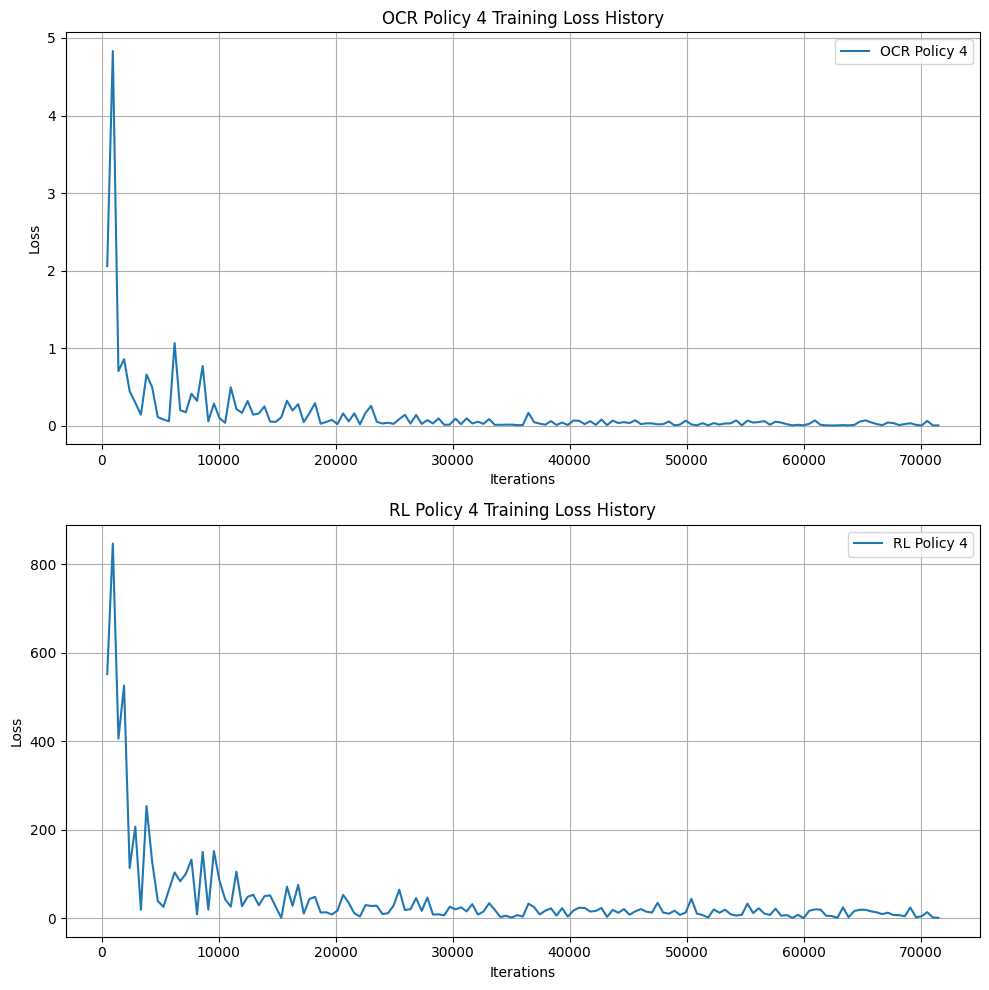

In [13]:
learning_rate = 1e-6
gamma=0.99
action_length = 48
epoch = 5
reward = "normal"
slow_start = True

agent_3, f1_score = main(learning_rate, gamma, action_length, epoch, reward, slow_start)

In [14]:
print(f"Experiment 3,test_f1_score: {f1_score} ")

Experiment 1,test_f1_score: 0.7935615341100288 
